In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import logging
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os              
os.environ['PYTHONHASHSEED'] = '0'
import desc
#import keras
import tensorflow as tf
from time import time                                                       
import sys

In [3]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [4]:
adata = sc.read_h5ad("/mnt/lugli/spuccio/Concatenato_Raw_annotato_filtered.h5ad")

In [5]:
adata.raw = adata

In [6]:
adata.raw.shape

(79260, 21456)

In [7]:
sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_genes(adata, min_cells=5)

In [8]:
adata.shape

(79239, 20360)

In [9]:
mito_genes = adata.var_names.str.startswith('mt-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

### Quality control

In [10]:
adata

AnnData object with n_obs × n_vars = 79239 × 20360
    obs: 'condition', 'replicate', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'percent_mito', 'n_counts'
    var: 'start_position', 'end_position', 'chromosome_name', 'gene_biotype', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

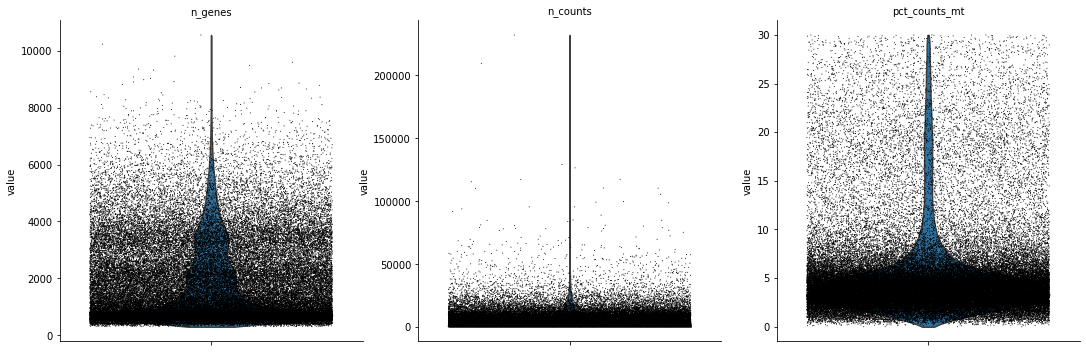

In [11]:
%matplotlib inline 
sc.pl.violin(adata, ['n_genes', 'n_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [12]:
adata = adata[adata.obs['n_genes'] < 3800, :]

In [13]:
adata = adata[adata.obs['pct_counts_mt'] < 10, :]

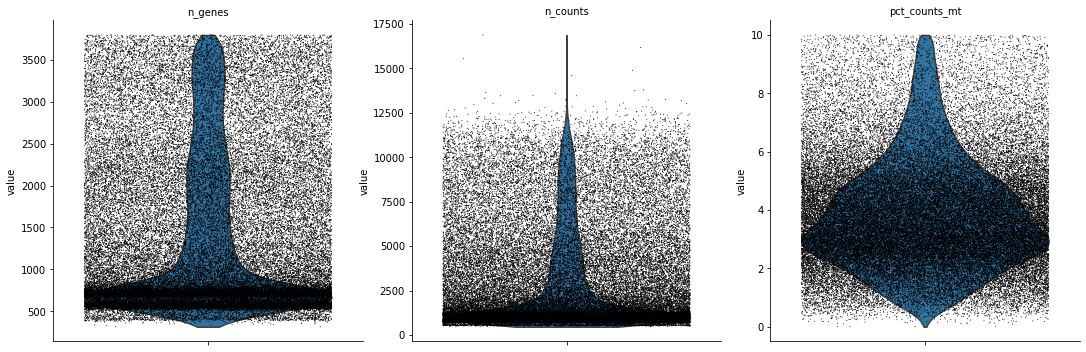

In [14]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [15]:
adata

View of AnnData object with n_obs × n_vars = 62672 × 20360
    obs: 'condition', 'replicate', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'percent_mito', 'n_counts'
    var: 'start_position', 'end_position', 'chromosome_name', 'gene_biotype', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

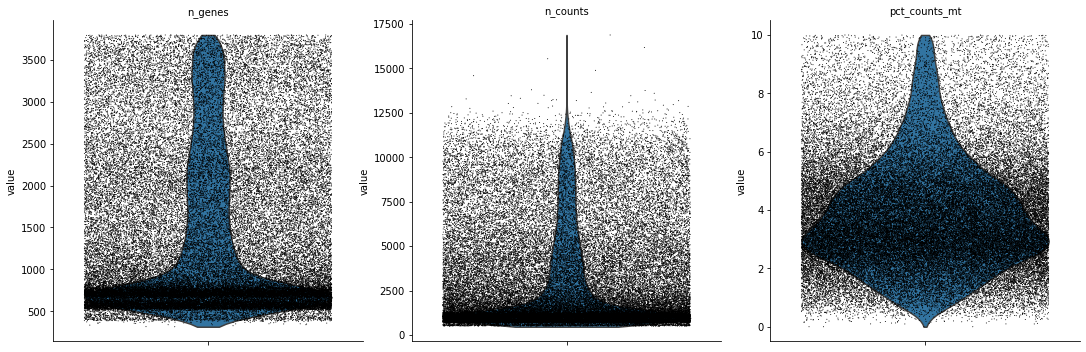

In [16]:
%matplotlib inline 
sc.pl.violin(adata, ['n_genes', 'n_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [17]:
adata.raw.shape

(79239, 21456)

In [18]:
adata.raw = adata

In [19]:
adata.raw.shape

(62672, 20360)

In [20]:
adata.layers["counts"] = adata.X.copy()

In [21]:
sc.pp.normalize_total(adata, target_sum=1e4) 

In [22]:
adata.layers["CPM"] = adata.X.copy()

In [23]:
desc.log1p(adata)

In [24]:
adata.layers["lopCPM"] = adata.X.copy()

In [25]:
obs = adata.obs

In [26]:
adata.raw=adata

In [27]:
df = adata.to_df().loc[:,~adata.to_df().columns.str.startswith('Rps')]

In [28]:
df.shape

(62672, 20315)

In [29]:
df = df.loc[:,~df.columns.str.startswith('Rpl')]

In [30]:
df.shape

(62672, 20258)

In [31]:
df = df.loc[:,~df.columns.str.startswith('Act')]

In [32]:
df.shape

(62672, 20232)

In [33]:
df = df.loc[:,~df.columns.str.startswith('Malat1')]
df.shape

(62672, 20231)

In [34]:
df = df.loc[:,~df.columns.str.startswith('mt')]
df.shape

(62672, 20231)

In [35]:
df = df.loc[:,~df.columns.str.startswith('Hb')]

In [36]:
df.shape

(62672, 20221)

In [37]:
adata2 = sc.AnnData(df)

In [39]:
adata2

AnnData object with n_obs × n_vars = 62672 × 20221

In [40]:
adata.raw = adata2

In [41]:
adata = adata.raw.to_adata()

In [42]:
adata.obs= obs

In [43]:
adata

AnnData object with n_obs × n_vars = 62672 × 20221
    obs: 'condition', 'replicate', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'percent_mito', 'n_counts'

In [44]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, subset=True)
# sc.pp.highly_variable_genes(adata,n_top_genes=1000,subset=True,inplace=True)

In [45]:
adata = adata[:, adata.var['highly_variable']]

In [46]:
adata.var['highly_variable'].tail(50)

2700081O15Rik    True
Hnrnpul2         True
Fth1             True
Fads1            True
Dagla            True
Syt7             True
Cpsf7            True
Ddb1             True
Prpf19           True
Dtx4             True
Rfk              True
Pcsk5            True
Rorb             True
Anxa1            True
Abhd17b          True
Tmem2            True
Trpm3            True
Klf9             True
Apba1            True
Vldlr            True
Rfx3             True
Jak2             True
9930021J03Rik    True
Stambpl1         True
Lipa             True
Lgi1             True
Slc35g1          True
Aldh18a1         True
AI606181         True
Slit1            True
Cnnm1            True
Scd2             True
Slf2             True
Sfxn3            True
As3mt            True
Ina              True
Sh3pxd2a         True
Slk              True
Sorcs3           True
Shoc2            True
Adra2a           True
Ablim1           True
Fam160b1         True
Gfra1            True
Hspa12a          True
Shtn1     

In [47]:
sc.pp.scale(adata,max_value=6,zero_center=True)

In [48]:
adata

AnnData object with n_obs × n_vars = 62672 × 2080
    obs: 'condition', 'replicate', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'percent_mito', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg'

### Integration

In [49]:
save_dir="/mnt/lugli/TempFolder"
adata=desc.train(adata,
        dims=[adata.shape[1],64,32],
        tol=0.005,
        n_neighbors=10,
        batch_size=256,
        louvain_resolution=[0.4,0.5,0.6,0.8,1.0],# not necessarily a list, you can only set one value, like, louvain_resolution=1.0
        save_dir=str(save_dir),
        do_tsne=False,
        learning_rate=200, # the parameter of tsne
        use_GPU=False,
        num_Cores=30,
        num_Cores_tsne=4,
        save_encoder_weights=False,
        save_encoder_step=3,# save_encoder_weights is False, this parameter is not used
        use_ae_weights=False,
        do_umap=True)

Start to process resolution= 0.4
The number of cpu in your computer is 32

use_ae_weights=False, the program will rerun autoencoder
Pretraining the 1th layer...
learning rate = 0.1
Train on 62672 samples
Epoch 1/50
62672/62672 [==============================] - 1s 23us/sample - loss: 0.7848
Epoch 2/50
62672/62672 [==============================] - 1s 18us/sample - loss: 0.7612
Epoch 3/50
62672/62672 [==============================] - 1s 18us/sample - loss: 0.7480
Epoch 4/50
62672/62672 [==============================] - 1s 18us/sample - loss: 0.7410
Epoch 5/50
62672/62672 [==============================] - 1s 18us/sample - loss: 0.7372
Epoch 6/50
62672/62672 [==============================] - 1s 17us/sample - loss: 0.7346
Epoch 7/50
62672/62672 [==============================] - 1s 18us/sample - loss: 0.7324
Epoch 8/50
62672/62672 [==============================] - 1s 18us/sample - loss: 0.7305
Epoch 9/50
62672/62672 [==============================] - 1s 18us/sample - loss: 0.7289
Epoc

In [50]:
prob_04=adata.uns["prob_matrix0.4"]
adata.obs["max.prob0.4"]=np.max(prob_04,axis=1)

In [51]:
adata

AnnData object with n_obs × n_vars = 62672 × 2080
    obs: 'condition', 'replicate', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'percent_mito', 'n_counts', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.8', 'desc_1.0', 'max.prob0.4'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'umap', 'prob_matrix0.4', 'prob_matrix0.5', 'prob_matrix0.6', 'prob_matrix0.8', 'prob_matrix1.0'
    obsm: 'X_Embeded_z0.4', 'X_umap', 'X_umap0.4', 'X_Embeded_z0.5', 'X_umap0.5', 'X_Embeded_z0.6', 'X_umap0.6', 'X_Embeded_z0.8', 'X_umap0.8', 'X_Embeded_z1.0', 'X_umap1.0'
    obsp: 'distances', 'connectivities'

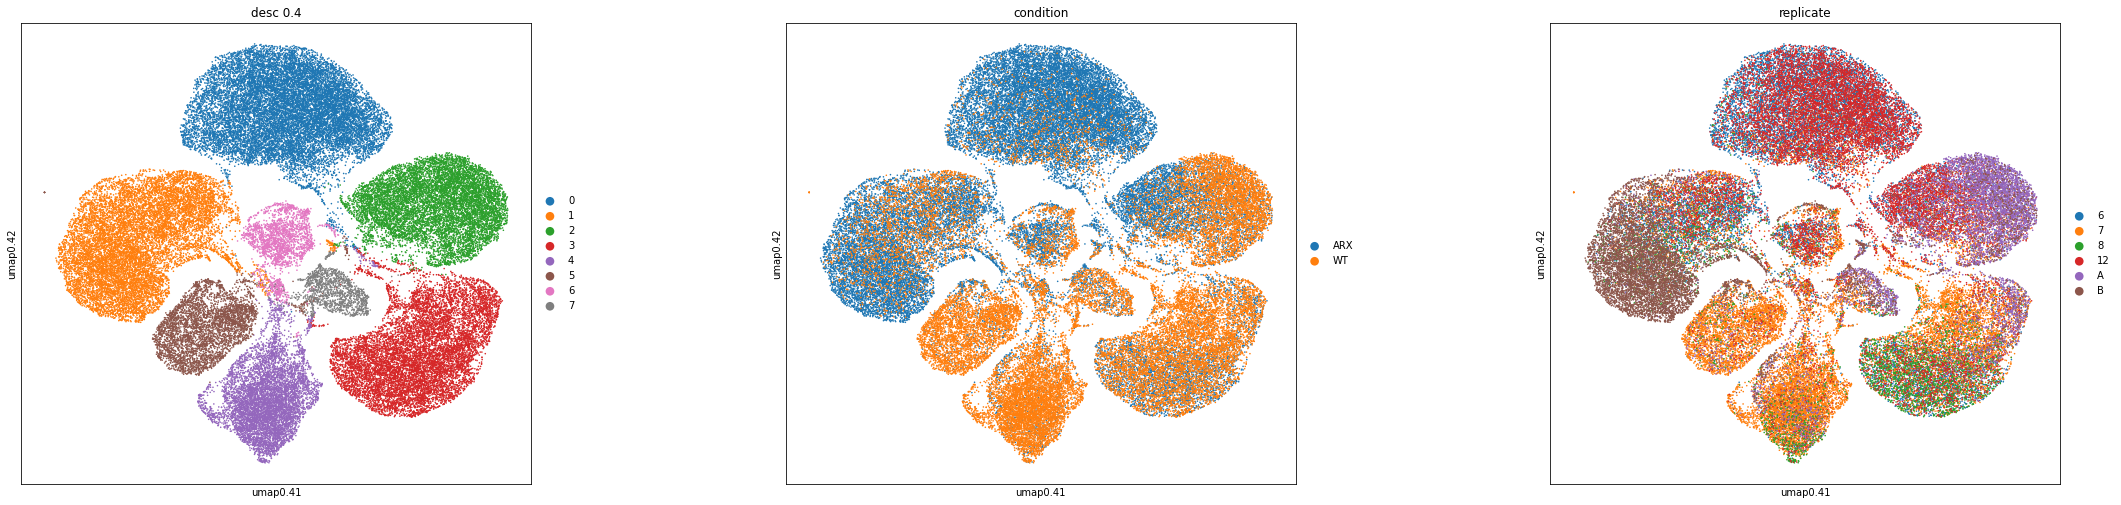

In [52]:
plt.rcParams['figure.figsize']=(8,8)
sc.pl.scatter(adata,basis="umap0.4",color=['desc_0.4',"condition","replicate"],size=10)

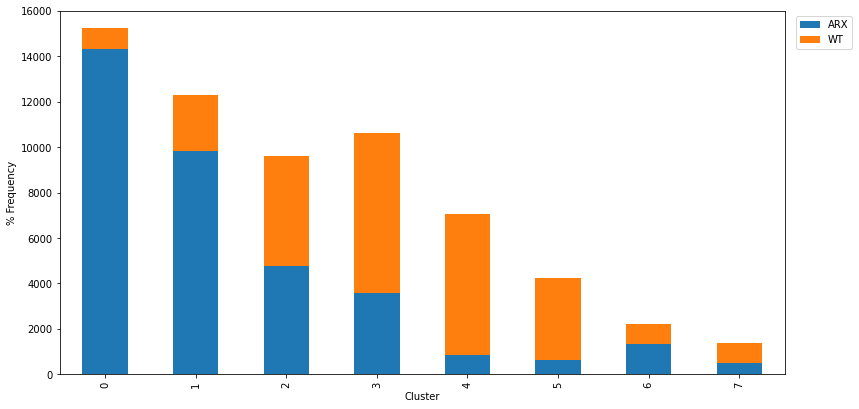

In [53]:
fig, (ax1) = plt.subplots(1,1, figsize=(33/2.54, 17/2.54))
ax1 = adata.obs.groupby("desc_0.4")["condition"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("% Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

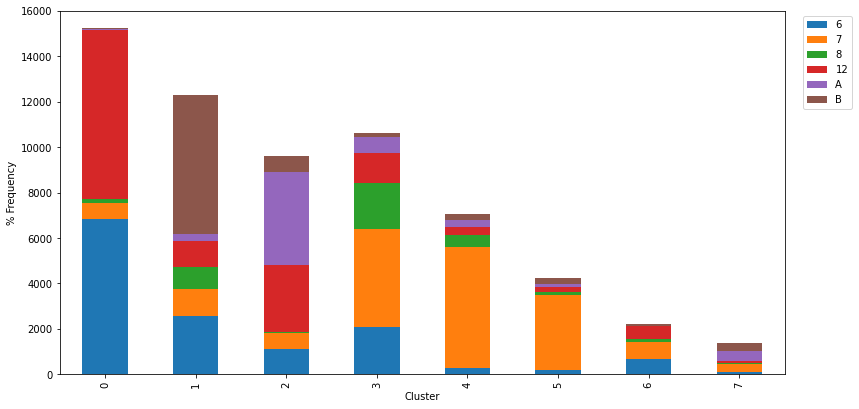

In [54]:
fig, (ax1) = plt.subplots(1,1, figsize=(33/2.54, 17/2.54))
ax1 = adata.obs.groupby("desc_0.4")["replicate"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("% Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

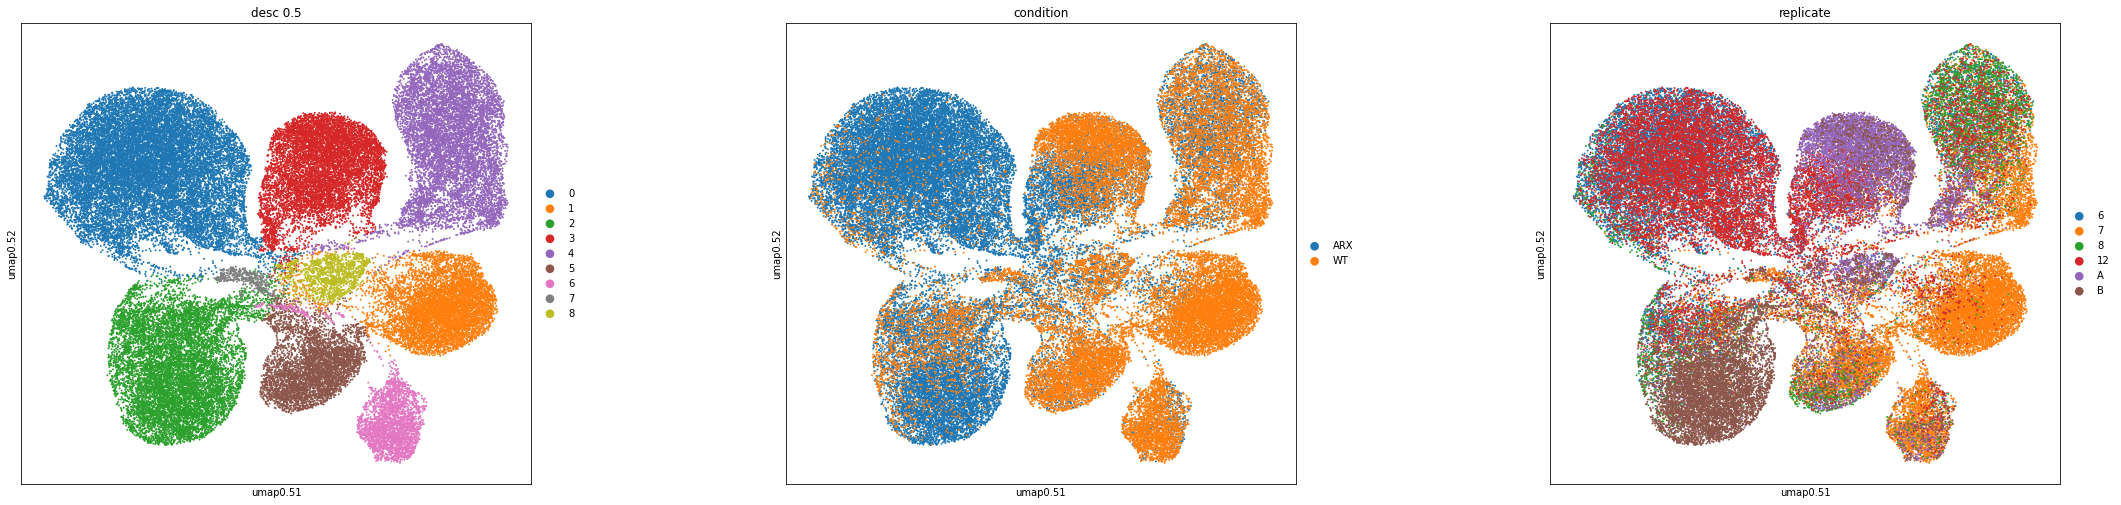

In [55]:
sc.pl.scatter(adata,basis="umap0.5",color=['desc_0.5',"condition","replicate"],size=15)

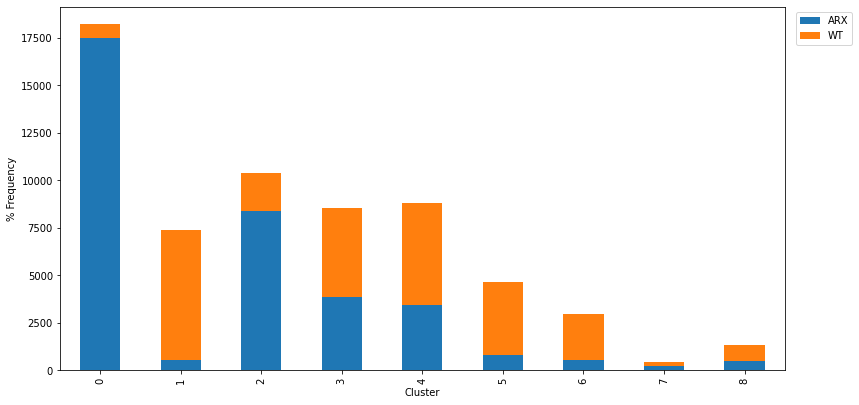

In [60]:
fig, (ax1) = plt.subplots(1,1, figsize=(33/2.54, 17/2.54))
ax1 = adata.obs.groupby("desc_0.5")["condition"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("% Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

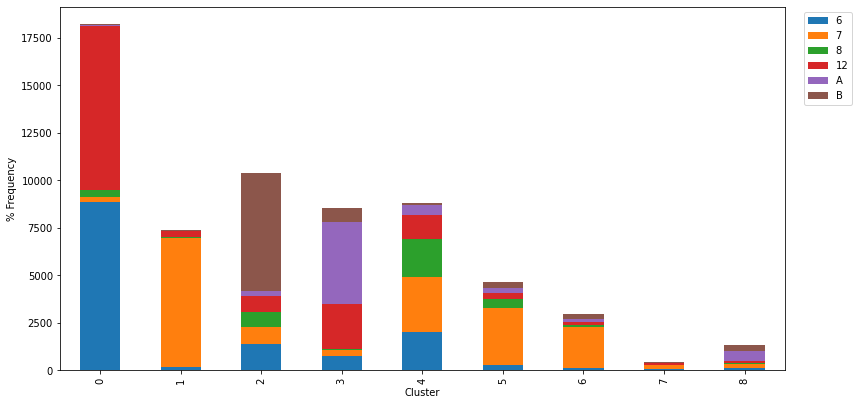

In [61]:
fig, (ax1) = plt.subplots(1,1, figsize=(33/2.54, 17/2.54))
ax1 = adata.obs.groupby("desc_0.5")["replicate"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("% Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

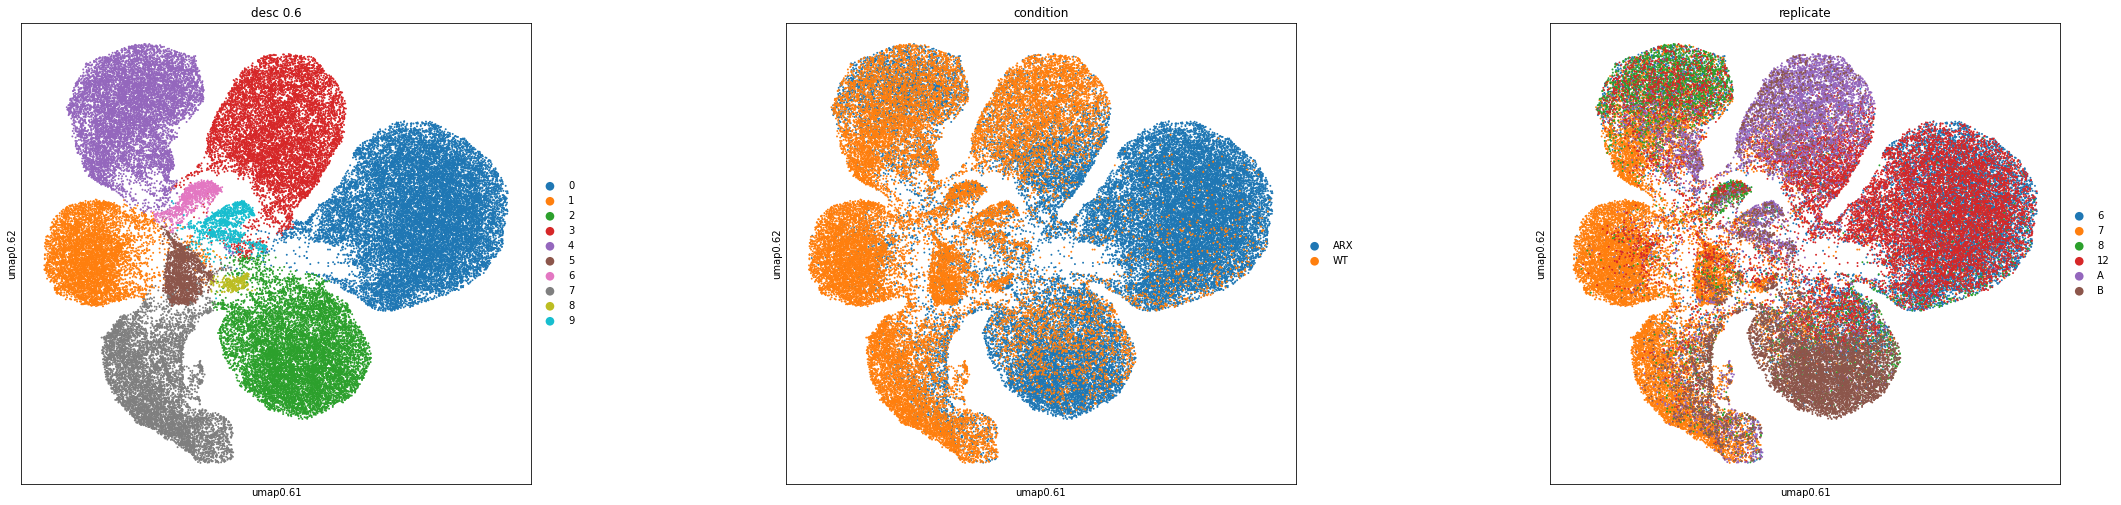

In [62]:
sc.pl.scatter(adata,basis="umap0.6",color=['desc_0.6',"condition","replicate"],size=15)

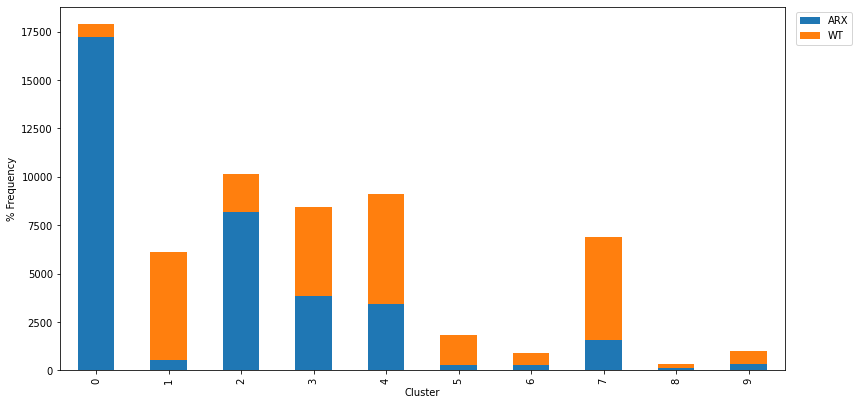

In [63]:
fig, (ax1) = plt.subplots(1,1, figsize=(33/2.54, 17/2.54))
ax1 = adata.obs.groupby("desc_0.6")["condition"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("% Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

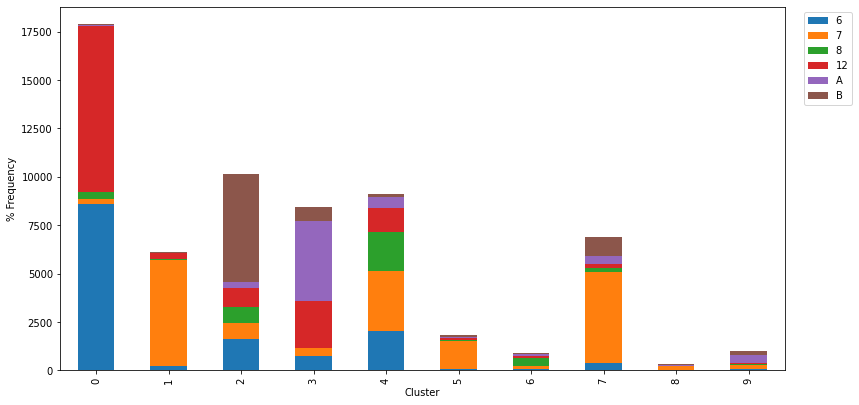

In [64]:
fig, (ax1) = plt.subplots(1,1, figsize=(33/2.54, 17/2.54))
ax1 = adata.obs.groupby("desc_0.6")["replicate"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("% Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

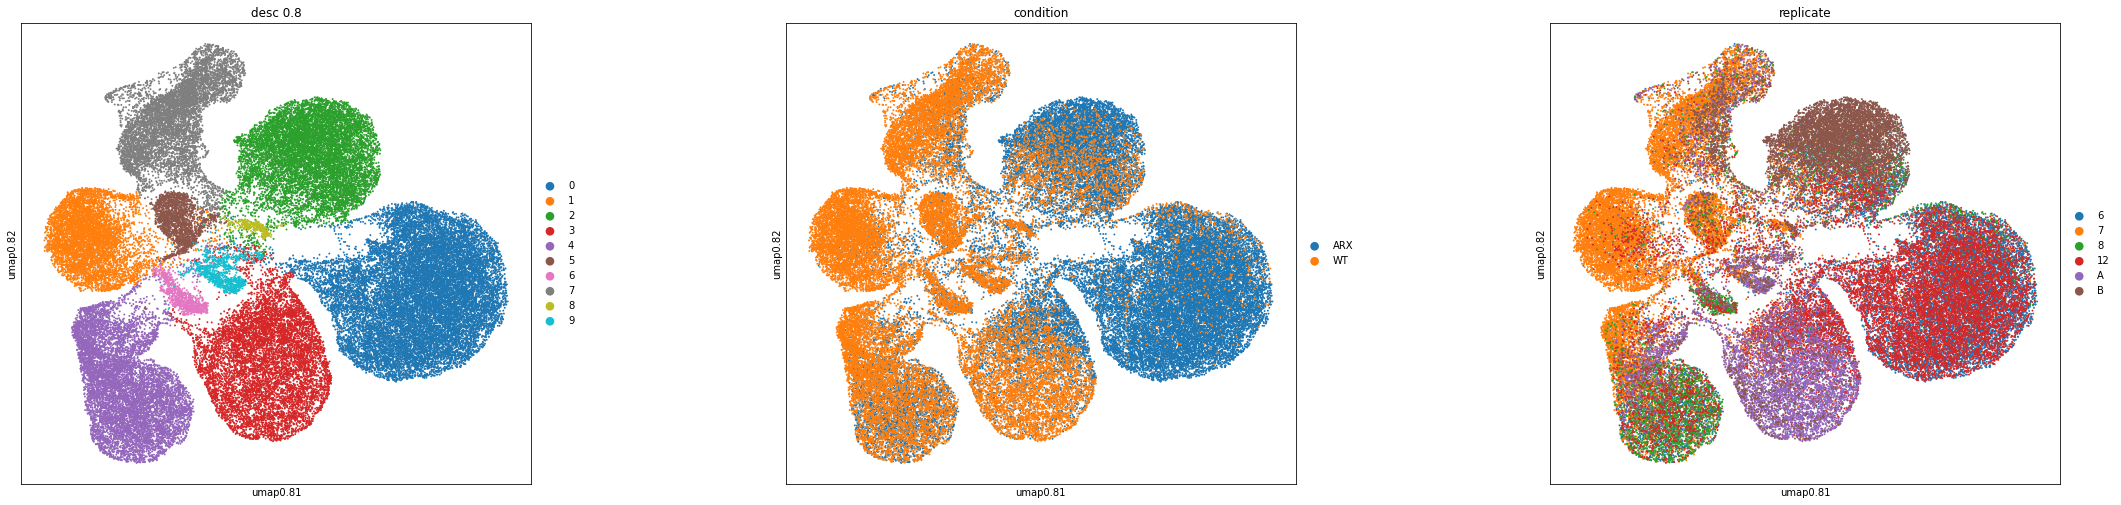

In [65]:
sc.pl.scatter(adata,basis="umap0.8",color=['desc_0.8',"condition","replicate"],size=15)

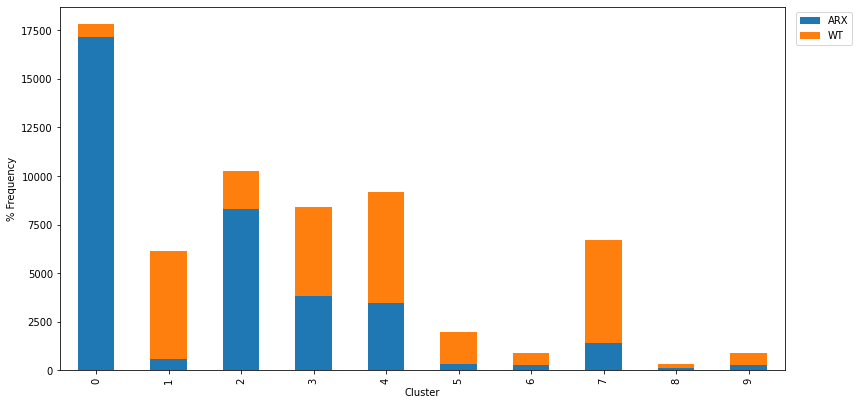

In [66]:
fig, (ax1) = plt.subplots(1,1, figsize=(33/2.54, 17/2.54))
ax1 = adata.obs.groupby("desc_0.8")["condition"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("% Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

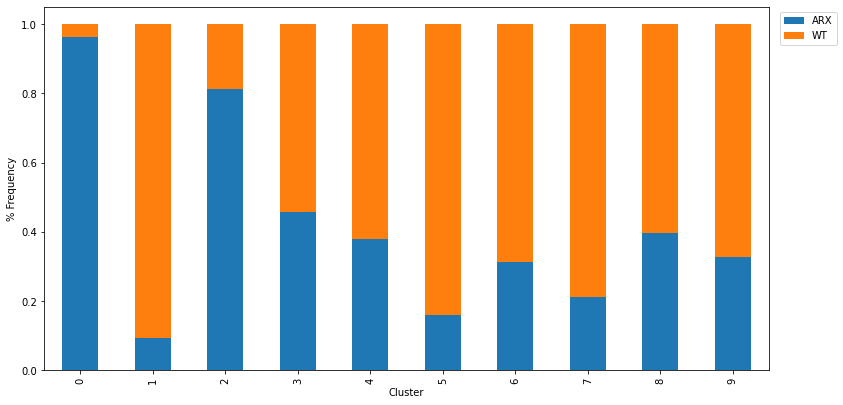

In [126]:
fig, (ax1) = plt.subplots(1,1, figsize=(33/2.54, 17/2.54))
ax1 = adata.obs.groupby("desc_0.8")["condition"].value_counts(normalize=True).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("% Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

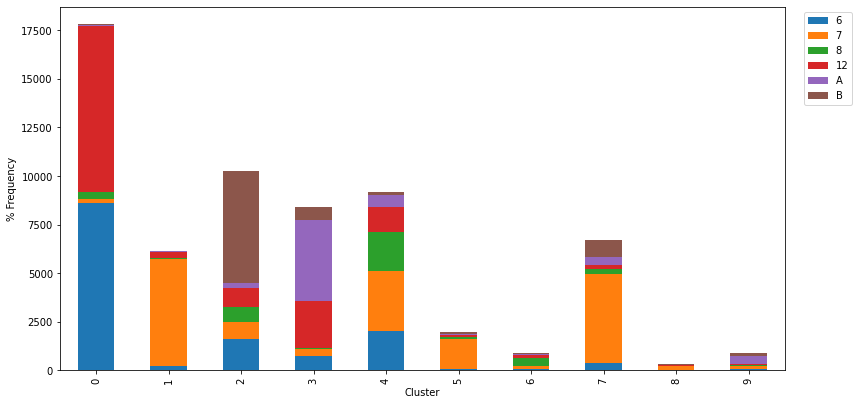

In [67]:
fig, (ax1) = plt.subplots(1,1, figsize=(33/2.54, 17/2.54))
ax1 = adata.obs.groupby("desc_0.8")["replicate"].value_counts(normalize=False).unstack().plot.bar(stacked=True,legend=False,ax=ax1)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("% Frequency")
ax1.grid(False)
ax1.legend(bbox_to_anchor=(1.1, 1.0))

In [68]:
adata.write("/mnt/lugli/spuccio/Concatenato_Raw_annotato_filtered_integrato.h5ad")

In [79]:
obs.shape

(62672, 14)

In [90]:
adata2.obs = pd.merge(obs,pd.DataFrame(adata2.obs),left_index=True,right_index=True)

In [94]:
adata2.obs = pd.merge(obs,pd.DataFrame(adata.obs),left_index=True,right_index=True)

In [97]:
adata2.raw = adata2

### DEGS

In [98]:
import scanpy as sc

In [110]:
sc.tl.rank_genes_groups(adata2, 'desc_0.4', method='t-test_overestim_var',use_raw=True)
pd.DataFrame(adata2.uns['rank_genes_groups']['names']).head(50)

0           1           2         3          4          5  \
0         Gm42418       Abhd2      Tmsb10     Myt1l      Hmgb2        Vim   
1        AY036118     Rpgrip1     Neurod2   Igfbpl1   Hist1h1b     Lgals1   
2           Lars2     Ccdc85c      Tuba1a     Epha5       Hes5       Cd63   
3         Gm26870     Slc24a5         Id2      Rtn1      Fabp7      Sparc   
4           Map1b      Clasp2      Tmsb4x     Ttc28        Dbi     Tagln2   
5            Nrep     Slc39a1     Neurod6    Sorbs2        Id3    S100a11   
6           Gria2        Nfia       Cd24a     Kif5c      Top2a  Tnfrsf12a   
7          Dpysl3      Notch2      Elavl3     Auts2      H2afz     Akap12   
8         Neurod6       Nr2f2        Chd3     Basp1      Ccnd2      Cald1   
9            Nfix       Kdm6b       Uba52    Frmd4b       Sox2       Rhoc   
10          Nr4a3    Tpm3-rs7     Bhlhe22  Kcnq1ot1         Qk      Anxa2   
11         Mpped1      Lrrc8a      Mllt11     Meis2      Hmgn2      Tagln   
12           Map2        Rrm2  AC149090.1   Cttnbp2        Mdk       Tpm1   
13          Mef2c         Ttr    Marcksl1    Map4k4        Id1     S100a6   
14     AC160336.1      Kdelr2       Tubb3     Olfm1        Vim      Anxa5   
15         Grin2b         Sct      Grcc10     Ctxn1      Pclaf   Serpinh1   
16  C230004F18Rik         Pam      Tagln3   Khdrbs3      Ddah1     Igfbp7   
17         Trim67        Pdpn     Igfbpl1    Pou3f2     Anp32b       Ctgf   
18           Mapt      Insig1        Oaz2    Fnbp1l      Mki67     Myl12a   
19         Camk2b      Tuba1a      Cdk5r1      Fez1      Cenpf    S100a10   
20          Cntn2        Cbx3        Sox4     Sox11   Hist1h1e        Msn   
21           Nefm      Tuba1b       Nop10     Mllt3       Prc1     Col4a1   
22         Fam49a        Pim1     Ppp2r2b      Dbn1     Lgals1      Clic1   
23        Hspa12a        Dpf1      Eef1e1     Gria2       Smc4       Gng5   
24        St8sia1      Sema4b      Gm3764    Sema3c  Hist1h2ap       Myl6   
25            Nin       Kmt2d      Gm9844      Bzw2      H2afv      Itgb1   
26           Fat4       Ube2c       Rbm4b  Ppp1r14b       Smc2       Lmna   
27           Nsg2       Sirt6   Hist3h2ba    Plxna4      Cdca8      Fabp7   
28           Nefl       Pttg1       Myt1l      Ldhb      Gnai2      Hspa5   
29          Satb2      Fn3krp        Lmo1   Ppp2r2b      Nedd4        Dbi   
30         Sptbn2       Gsdme       Ctxn1    Tnrc6c      Prdx1      Cyr61   
31          Tmtc1        Lrp4       Calm2   Gm26735     Atp5g2        Id3   
32         Tuba1a        Pcp4      Fkbp1a     Aplp1      Gapdh   Hist1h1b   
33         Gpr161       Cxcr4        Eef2   Hnrnpa0       Gng5       Tpm4   
34           Irgq     Slitrk2       Hecw1     Akap9      Ube2c      Hspb1   
35           Ptms       Pclaf      Bcl11b    Tagln3       Nasp       Pfn1   
36          Brsk1     Gm26511      Ccl27a     Ptprd   Ppp1r14b      Ddah1   
37         Kctd12        Hsf2    Hist3h2a     Stmn1    Hsp90b1        Esd   
38          Snhg9        Cks2       Sstr2    Plxna2        Dek      Anxa3   
39         Hivep2       Ogdhl       Snrpn      Nrp1       Rbm3     Tm4sf1   
40         Csrnp3       Prdx1      Gm1673      Tcf4       Cst3    Hsp90b1   
41        Dync1h1        Tsku        Nfix     Soga3     Zbtb20       Txn1   
42        Gm29237       Sfxn5      Atpif1    Dpysl5      H2afx     Col4a2   
43          Celf5     Slc2a12        Nfib     Rab3a     Hnrnpd       Cnn2   
44        Gucy1a1       Cdc20      Snrpb2  Atxn7l3b      Hmgb1       Hes1   
45          Ccbe1  AC146911.1      Eif4a2    Zbtb18        Mt3      Gapdh   
46          Myo5a     Runx1t1       Eef1g     Robo2       Tpx2         Qk   
47         B3gat1     Dynlt1a       Celf2     Kdm1a    Selenoh       Cst3   
48         Pou6f1         Lxn      Dazap1     Celf2       Tpt1      Thbs1   
49        Slc26a7         Pbk      Fam32a    Myl12b        Arx     Cdkn1a   

           6         7  
0    Gm42418      Meg3  
1     Lgals3     Gap43  
2       Ctsd 

In [111]:
result = adata2.uns['rank_genes_groups']

In [112]:
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:3]: result[key][group]
    for group in groups for key in ['names', 'pvals','logfoldchanges']}).to_csv("/mnt/lugli/spuccio/Integrated_res04_DEGS.csv",header=True,index=False)

In [113]:
sc.tl.rank_genes_groups(adata2, 'desc_0.6', method='t-test_overestim_var',use_raw=True)
pd.DataFrame(adata2.uns['rank_genes_groups']['names']).head(50)

0         1           2           3         4          5  \
0         Gm42418  Hist1h1b       Abhd2      Tmsb10     Myt1l     Igfbp7   
1        AY036118   Gm26735     Rpgrip1     Neurod2   Igfbpl1        Vim   
2           Lars2      Tpt1     Slc24a5         Id2    Sorbs2     Col4a1   
3         Gm26870  Ppp1r14b      Clasp2       Cd24a     Ttc28      Tagln   
4           Map1b   Slc24a5     Ccdc85c      Tuba1a     Epha5      Cald1   
5            Nrep       Ptn      Tuba1a      Tmsb4x      Rtn1       Ctgf   
6          Dpysl3  Hist1h1e       Kdm6b       Uba52     Basp1     Tagln2   
7           Gria2      Ulk4       Nr2f2    Marcksl1     Auts2     Lgals1   
8            Nfix     Fabp7        Nfia      Mllt11     Kif5c      Sparc   
9         Neurod6   Hnrnpa0      Lrrc8a     Igfbpl1    Frmd4b       Cd63   
10           Map2       Dbi    Tpm3-rs7       Tubb3   Cttnbp2       Tpm1   
11          Mef2c       Vim     Slc39a1     Neurod6     Ctxn1       Rhoc   
12          Nr4a3    Hnrnpd         Pam      Tagln3     Meis2      Anxa5   
13     AC160336.1      Cbx3        Dpf1  AC149090.1     Olfm1     S100a6   
14         Grin2b     Hmgb2        Cbx3      Elavl3   Khdrbs3   Serpinh1   
15  C230004F18Rik    Zbtb20      Tmsb10      Grcc10     Sox11     Col4a2   
16         Trim67      Nfia         Ttr     Bhlhe22    Map4k4      Anxa2   
17         Mpped1     H2afz      Insig1        Oaz2    Plxna4      Hspb1   
18            Nin   Hsp90b1      Kdelr2        Chd3      Bzw2      Itgb1   
19         Camk2b   Igfbpl1     Runx1t1       Nop10     Mllt3    S100a11   
20           Mapt    Supt16      Sema4b      Gm3764  Kcnq1ot1     Myl12a   
21        Hspa12a      Hes5       Kmt2d       Rbm4b    Fnbp1l    Filip1l   
22          Tmtc1  Kcnq1ot1        Pim1   Hist3h2ba      Fez1     Akap12   
23        St8sia1    Eef1b2        Hsf2       Eef1g    Pou3f2        Msn   
24         Csrnp3   Rpgrip1       Gsdme     Ppp2r2b   Ppp2r2b       Tpm4   
25           Fat4       Mdk       Sirt6      Fkbp1a    Tagln3       Cnn2   
26          Cntn2     Top2a        Pcp4       Ctxn1      Ldhb      Anxa1   
27         Kctd12     Rack1     Gm26511       Calm2     Gria2     Fermt2   
28          Snhg9     Hmgcr      Fn3krp       Sstr2  Ppp1r14b       Myh9   
29         Pou6f1    Ptges3     Slc2a12        Lmo1      Dbn1       Myl6   
30          Brsk1     Ywhaz         Sct      Eef1e1    Tnrc6c      Anxa3   
31          Adcy1     Epha5      Spock1        Sox4     Aplp1  Tnfrsf12a   
32           Nefm     H3f3a       Ncam1        Eef2    Plxna2     Tm4sf1   
33           Nefl      Npm1       Ogdhl       Myt1l    Sema3c       Tpm2   
34          Satb2     Fabp5       Cxcr4      Atpif1     Rab3a        Esd   
35         Hivep2      Ppia      Ppp6r2      Cox6b1    Dpysl5       Myl9   
36        Gm29237      Eid1         Ubb    Hist3h2a   Gm26735      Thbs1   
37        Gucy1a1      Top1     Gm26699        Lsm7     Stmn1       Gng5   
38            Bc1      Rbm3    Ppp1r16b      Gm9844   Hnrnpa0       Lmna   
39          Myo5a       Pam        Tsku       Snrpn     Robo2      Clic1   
40         Fam49a    Atp5g2     Dynlt1a      Eif4a2     Akap9      Csrp1   
41        Slc26a7     Cyp51        Gnb1      Fam32a     Ptprd        Fn1   
42        Cacna1e      Rtn1     Slitrk2     Tspan13     Celf2      Hspa5   
43         Nmnat2   Khdrbs3        Ftl1        Nnat  Atxn7l3b      Gng11   
44           Sox4     Hspa5  AC146911.1        Rtn1     Soga3     Iqgap1   
45           Nsg2      Cst3        Taf6      Dazap1      Nrp1      Hmox1   
46           Ptms  Hsp90ab1      Notch2      Gm1673    Zbtb18      Cyr61   
47          Ccbe1      Ppib     Fam19a1     Tsc22d1      Tcf4   Serpine1   
48          Kcnj2     Eif1b   D17H6S53E      Rbfox2    Myl12b     Arpc1b   
49           Irgq     Meis2      Zfp691      Snrpb2     Kdm1a      Hmga2   

                6         7         8         9  
0           Nrxn3     Fabp7      Fth1      Meg3  
1         Dlx6os1     Hmgb2    Lgals3  

In [114]:
result = adata2.uns['rank_genes_groups']

In [115]:
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:3]: result[key][group]
    for group in groups for key in ['names', 'pvals','logfoldchanges']}).to_csv("/mnt/lugli/spuccio/Integrated_res06_DEGS.csv",header=True,index=False)

In [116]:
sc.tl.rank_genes_groups(adata2, 'desc_0.8', method='t-test_overestim_var',use_raw=True)
pd.DataFrame(adata2.uns['rank_genes_groups']['names']).head(50)

0         1           2           3         4          5  \
0         Gm42418  Hist1h1b       Abhd2      Tmsb10     Myt1l        Vim   
1        AY036118      Tpt1     Rpgrip1     Neurod2   Igfbpl1     Igfbp7   
2           Lars2   Gm26735     Slc24a5         Id2    Sorbs2     Col4a1   
3         Gm26870  Ppp1r14b      Clasp2       Cd24a     Ttc28      Tagln   
4           Map1b   Slc24a5     Ccdc85c      Tuba1a     Epha5      Cald1   
5            Nrep  Hist1h1e       Kdm6b      Tmsb4x      Rtn1       Ctgf   
6          Dpysl3       Ptn        Nfia       Uba52     Basp1     Tagln2   
7           Gria2      Ulk4      Tuba1a      Mllt11     Auts2     Lgals1   
8            Nfix     Fabp7       Nr2f2    Marcksl1     Kif5c      Sparc   
9         Neurod6       Vim      Lrrc8a     Igfbpl1    Frmd4b       Cd63   
10           Map2   Hnrnpa0    Tpm3-rs7       Tubb3   Cttnbp2       Tpm1   
11          Mef2c       Dbi     Slc39a1     Neurod6     Ctxn1       Rhoc   
12          Nr4a3     Hmgb2        Cbx3      Tagln3     Meis2      Anxa5   
13     AC160336.1    Hnrnpd         Pam  AC149090.1   Khdrbs3     S100a6   
14  C230004F18Rik      Cbx3        Dpf1      Elavl3     Olfm1   Serpinh1   
15         Grin2b    Zbtb20      Kdelr2     Bhlhe22     Sox11      Anxa2   
16         Trim67      Nfia         Ttr      Grcc10    Plxna4     Col4a2   
17            Nin     H2afz      Insig1        Oaz2    Map4k4      Hspb1   
18         Mpped1   Hsp90b1      Tmsb10        Chd3      Bzw2    S100a11   
19         Camk2b    Eef1b2      Sema4b       Nop10  Kcnq1ot1      Itgb1   
20           Mapt   Igfbpl1        Pim1       Rbm4b    Fnbp1l     Myl12a   
21        Hspa12a    Supt16       Kmt2d      Gm3764     Mllt3     Akap12   
22          Tmtc1  Kcnq1ot1        Hsf2     Ppp2r2b      Fez1        Msn   
23        St8sia1   Rpgrip1       Gsdme       Eef1g    Pou3f2    Filip1l   
24         Csrnp3     Rack1     Runx1t1   Hist3h2ba   Ppp2r2b  Tnfrsf12a   
25          Snhg9      Hes5       Sirt6      Fkbp1a    Tagln3       Tpm4   
26         Pou6f1     Top2a        Pcp4       Calm2     Gria2       Myl6   
27         Kctd12       Mdk      Fn3krp       Ctxn1      Ldhb      Anxa3   
28           Fat4     Hmgcr      Notch2        Lmo1    Tnrc6c       Cnn2   
29          Cntn2     Ywhaz       Cxcr4      Eef1e1     Aplp1       Myh9   
30           Nefm      Ppia     Gm26511        Sox4      Dbn1      Anxa1   
31           Nefl     H3f3a     Slc2a12       Myt1l    Sema3c     Tm4sf1   
32        Gm29237    Ptges3         Sct       Sstr2    Plxna2     Fermt2   
33         Hivep2     Epha5       Ncam1    Hist3h2a  Ppp1r14b       Gng5   
34          Adcy1      Eid1      Tuba1b      Atpif1     Rab3a       Lmna   
35         Fam49a      Npm1      Spock1      Gm9844     Stmn1      Clic1   
36        Gucy1a1     Fabp5        Gnb1      Eif4a2    Dpysl5        Esd   
37          Myo5a      Top1         Ubb       Snrpn     Akap9      Thbs1   
38          Satb2      Rbm3     Slitrk2        Lsm7     Robo2       Tpm2   
39            Bc1   Khdrbs3        Ftl1        Eef2   Gm26735       Myl9   
40        Slc26a7    Atp5g2       Ogdhl      Cox6b1     Ptprd      Csrp1   
41          Brsk1       Pam     Dynlt1a     Tspan13   Hnrnpa0      Hspa5   
42        Cacna1e      Rtn1      Ppp6r2        Nnat     Celf2        Fn1   
43           Sox4     Cyp51        Taf6      Dazap1      Nrp1      Cyr61   
44          Ccbe1     Hspa5     Gm26699      Fam32a  Atxn7l3b     Iqgap1   
45         Nmnat2      Ppib        Rrm2        Rtn1     Soga3      Hmga2   
46           Ptms       Ckb        Pdpn      Gm1673    Zbtb18      Gng11   
47           Nsg2    Lgals1        Tsku       Mtch2      Tcf4      Hmox1   
48         B3gat1      Cst3    Ppp1r16b      Ccl27a    Myl12b     Arpc1b   
49         Slc7a3    Cdkn1b  AC146911.1     Dynlrb1    Cited2   Serpine1   

          6         7         8         9  
0     Nrxn3     Fabp7      Fth1      Meg3  
1   Dlx6os1       Dbi    Lgals3     Gap43  
2      

In [117]:
result = adata2.uns['rank_genes_groups']

In [118]:
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:3]: result[key][group]
    for group in groups for key in ['names', 'pvals','logfoldchanges']}).to_csv("/mnt/lugli/spuccio/Integrated_res08_DEGS.csv",header=True,index=False)

In [124]:
adata.write("/mnt/lugli/spuccio/Concatenato_Raw_annotato_filtered_integrato2.h5ad")

In [125]:
adata2.write("/mnt/lugli/spuccio/Concatenato_Raw_annotato_filtered_integrato2.h5ad")

In [332]:
adata2

AnnData object with n_obs × n_vars = 62672 × 1664
    obs: 'condition', 'replicate', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'percent_mito', 'n_counts', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.8', 'desc_1.0', 'max.prob0.4', 'max.prob0.5'
    var: 'start_position', 'end_position', 'chromosome_name', 'gene_biotype', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'condition_colors', 'desc_0.4_colors', 'desc_0.5_colors', 'desc_0.6_colors', 'desc_0.8_colors', 'hvg', 'prob_matrix0.4', 'prob_matrix0.5', 'prob_matrix0.6', 'prob_matrix0.8', 'prob_matrix1.0', 'replicate_colors', 'umap'
    obsm: 'X_Embeded_z0.4', 'X_Embeded_z0.5', 'X_Embeded_z0.6', 'X_Embeded_z0.8', 'X_Embeded_z1.0', 'X_umap', 'X_umap0.4', 'X_umap0.5', '

In [120]:
result = adata2.uns['rank_genes_groups']

In [121]:
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:3]: result[key][group]
    for group in groups for key in ['names', 'pvals','logfoldchanges']}).to_csv("/mnt/lugli/spuccio/Integrated_res06_redu_DEGS.csv",header=True,index=False)

### Traiettorie

In [148]:
sc.tl.pca(adata2, svd_solver='arpack')

In [149]:
sc.pp.neighbors(adata2, n_neighbors=4, n_pcs=20)


In [154]:
sc.tl.draw_graph(adata2)

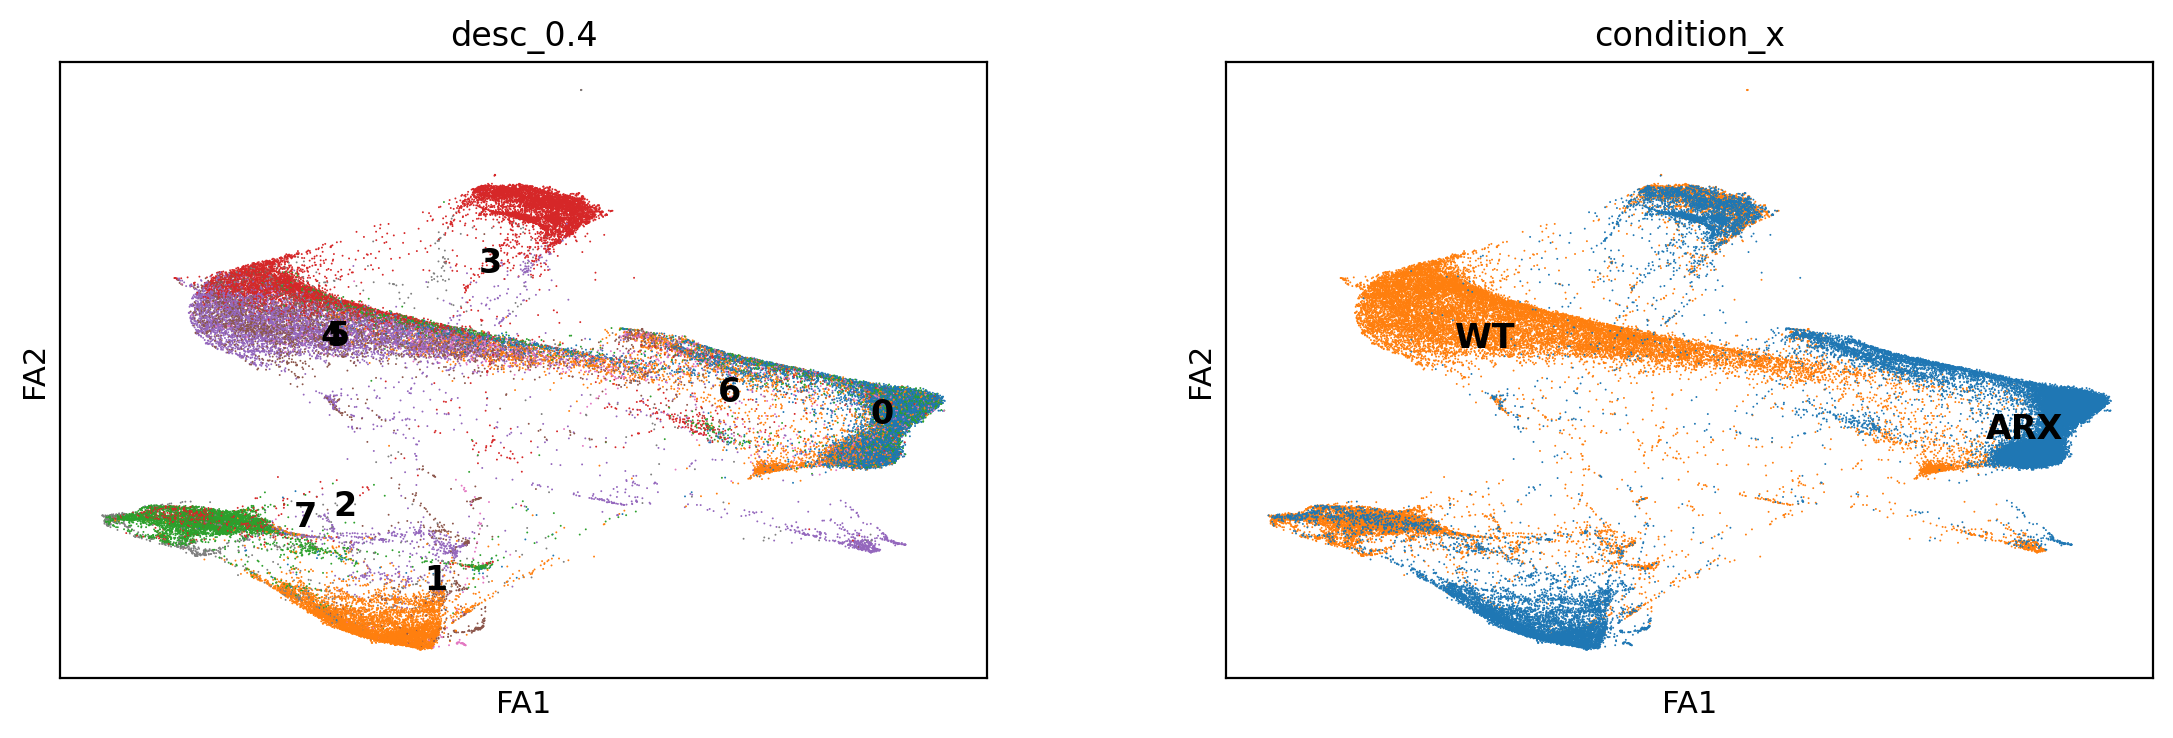

In [163]:
sc.pl.draw_graph(adata2,color=['desc_0.4','condition_x'], legend_loc='on data')

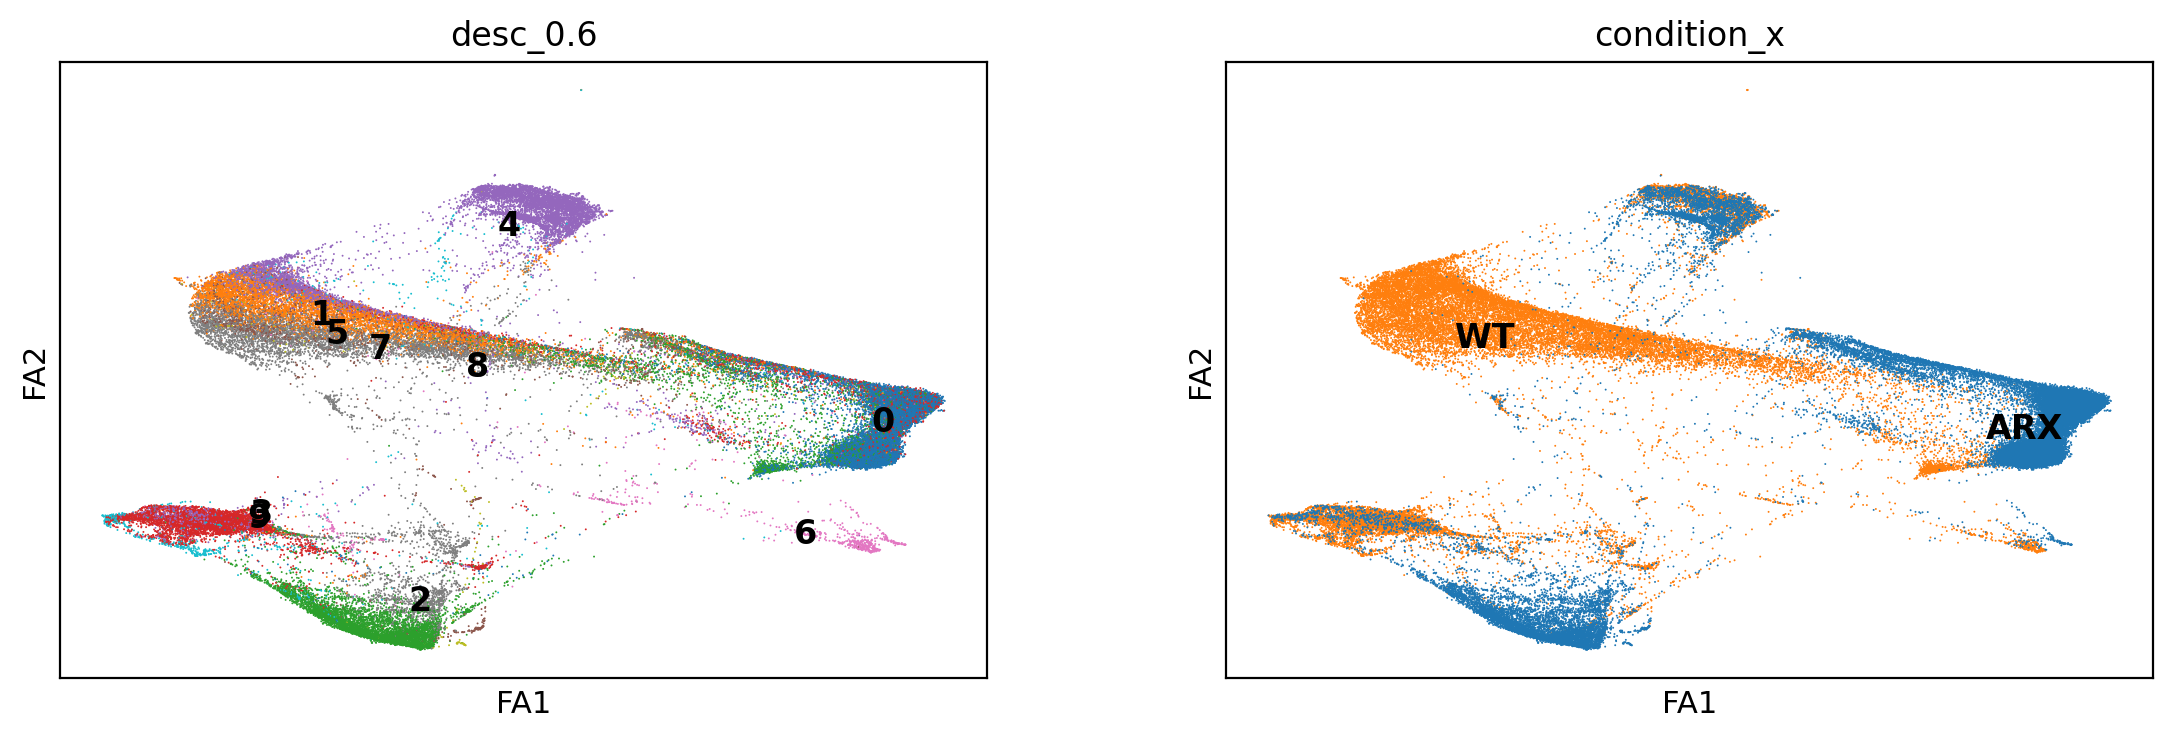

In [161]:
sc.pl.draw_graph(adata2,color=['desc_0.6','condition_x'], legend_loc='on data')

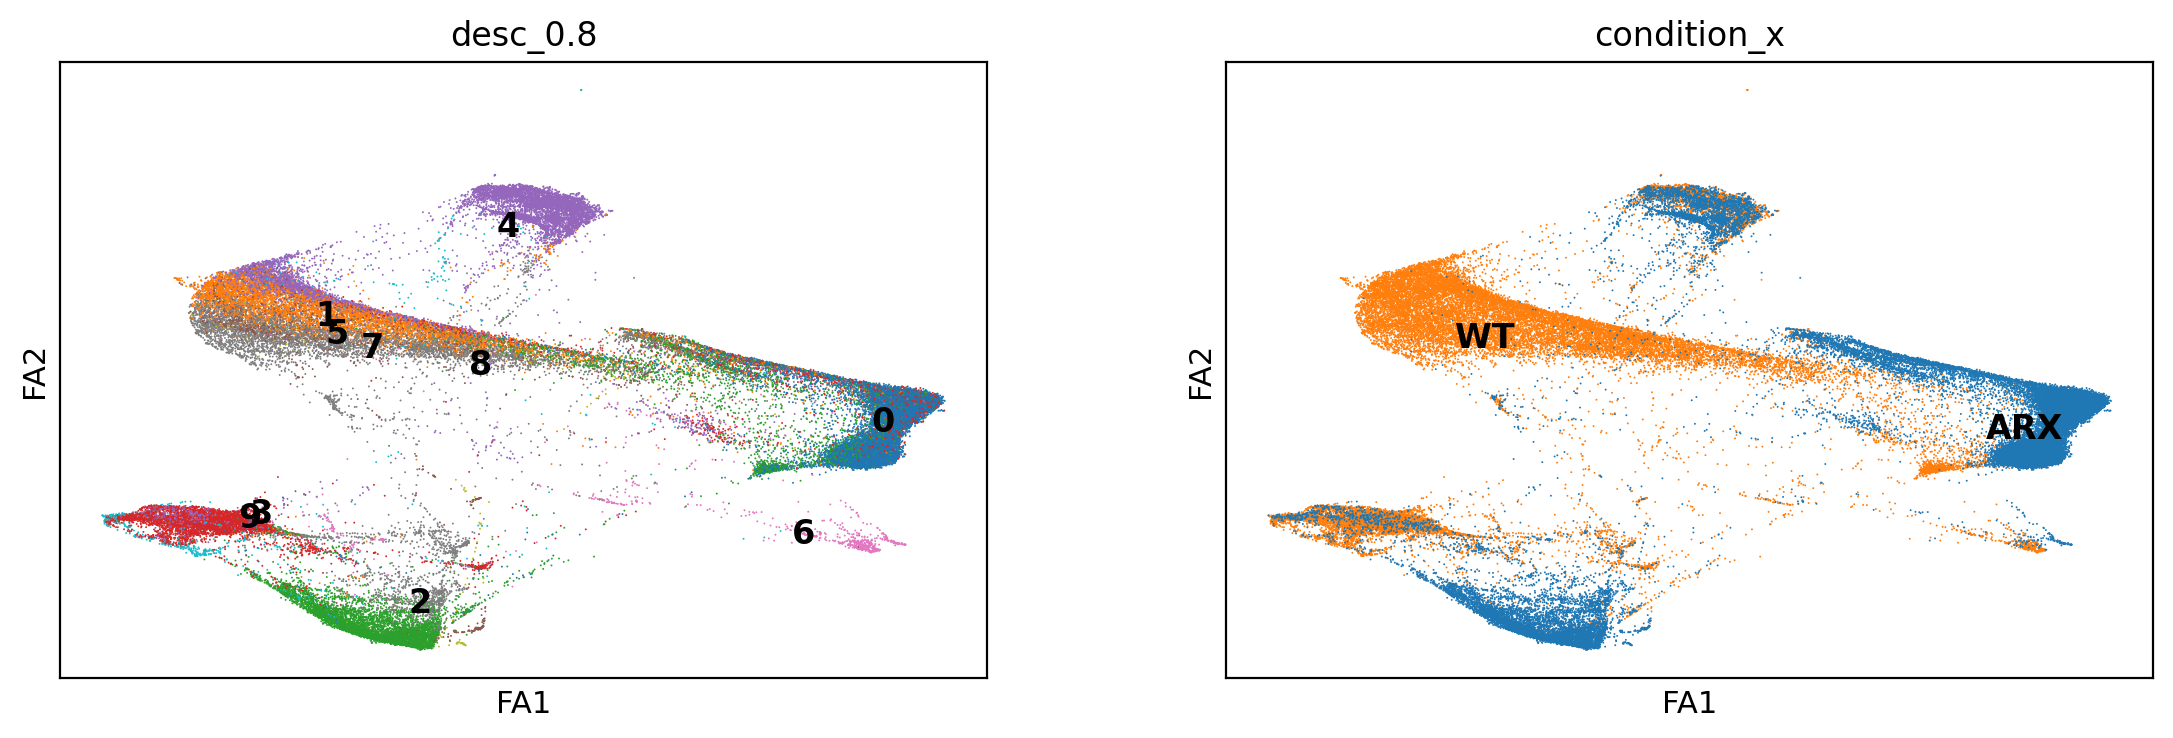

In [162]:
sc.pl.draw_graph(adata2,color=['desc_0.8','condition_x'], legend_loc='on data')